# EV Calculator For Systematic Coupons

In [31]:
def factorial (n = 1):
    if n in [0, 1]:
        return 1
    else:
        return n * factorial(n - 1)

def combination_calculator(n, r):
    return int(factorial(n)/(factorial(r) * factorial(n - r)))

def ev_calculator(n = 4, r = 2, p = 0.7, m = 6, o = 1.5):
    q = 1 - p
    combinations = combination_calculator(n, r)
    amount_per_bet = m / combinations
    binomials, profits = [], []

    for i in range(n + 1):
        binomials.append(combination_calculator(n, i) * (p ** i) * (q ** (n - i)))
        if i < r:
            profits.append(-m)
        else:
            profits.append(combination_calculator(i, r) * (o ** r) * amount_per_bet - m)
    
    ev_values = [b * p for b, p in zip(binomials, profits)]
    return sum(ev_values)
ev_calculator(4, 2)

0.6149999999999994

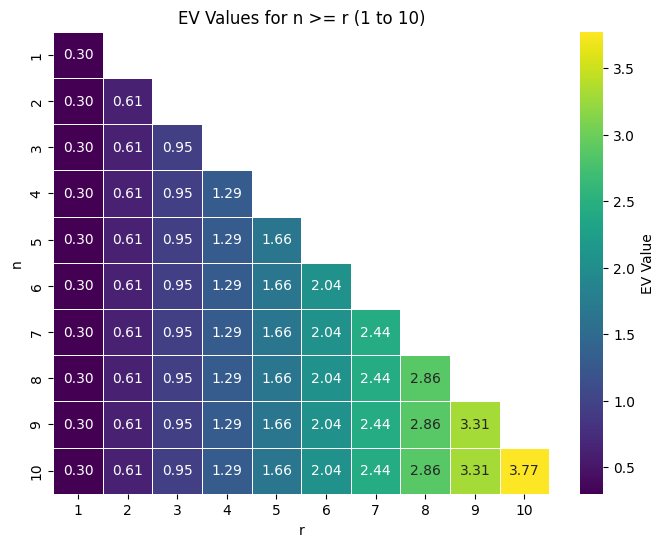

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming ev_calculator(i, j) is already defined

n_values = np.arange(1, 11)
r_values = np.arange(1, 11)

# Create a 2D array to store the results
results = np.zeros((len(n_values), len(r_values)))

# Fill the array, ensuring i >= j
for idx_i, i in enumerate(n_values):
    for idx_j, j in enumerate(r_values):
        if i >= j:
            results[idx_i, idx_j] = ev_calculator(i, j)
        else:
            results[idx_i, idx_j] = np.nan  # Set NaN for i < j



# Create a DataFrame to display the values clearly
df = pd.DataFrame(results, index=r_values, columns=r_values)

# Optional: Show the heatmap as well
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'EV Value'}, linewidths=.5)
plt.xlabel('r')
plt.ylabel('n')
plt.title('EV Values for n >= r (1 to 10)')
plt.show()